# Keggle Bike Share Competition - Spiced 2022 - Valentin Lorenzen

### Initialization

In [295]:
# loading libraries

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

import statistics
import math




In [296]:
# define seaborn style for the whole project

plt.style.use("seaborn-dark")
plt.rcParams.update({'font.size': 15})

In [297]:
# loading dataset

df = pd.read_csv("data/train.csv", index_col=0, parse_dates=True)

In [298]:
# looking at the data

df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [299]:
# extracting hours, year, month and day from datetime

df['hour'] = df.index.hour

df['year'] = df.index.year

df["month"] = df.index.month

df["day"] = df.index.day

df["dow"] = df.index.dayofweek

df["woy"] = df.index.weekofyear

df.head(5)

/tmp/ipykernel_7532/2015169735.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df["woy"] = df.index.weekofyear


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day,dow,woy
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,1,1,5,52
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,1,5,52
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1,1,5,52
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,1,1,5,52
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,1,1,5,52


In [300]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day,dow,woy
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,1,1,5,52
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011,1,1,5,52
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2011,1,1,5,52
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,2011,1,1,5,52
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,2011,1,1,5,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,2012,12,19,2,51
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,2012,12,19,2,51
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,2012,12,19,2,51


### Data Exploration

In [301]:
# show me the data-frame

df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day,dow,woy
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,1,1,5,52
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011,1,1,5,52
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2011,1,1,5,52
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,2011,1,1,5,52
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,2011,1,1,5,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,2012,12,19,2,51
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,2012,12,19,2,51
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,2012,12,19,2,51


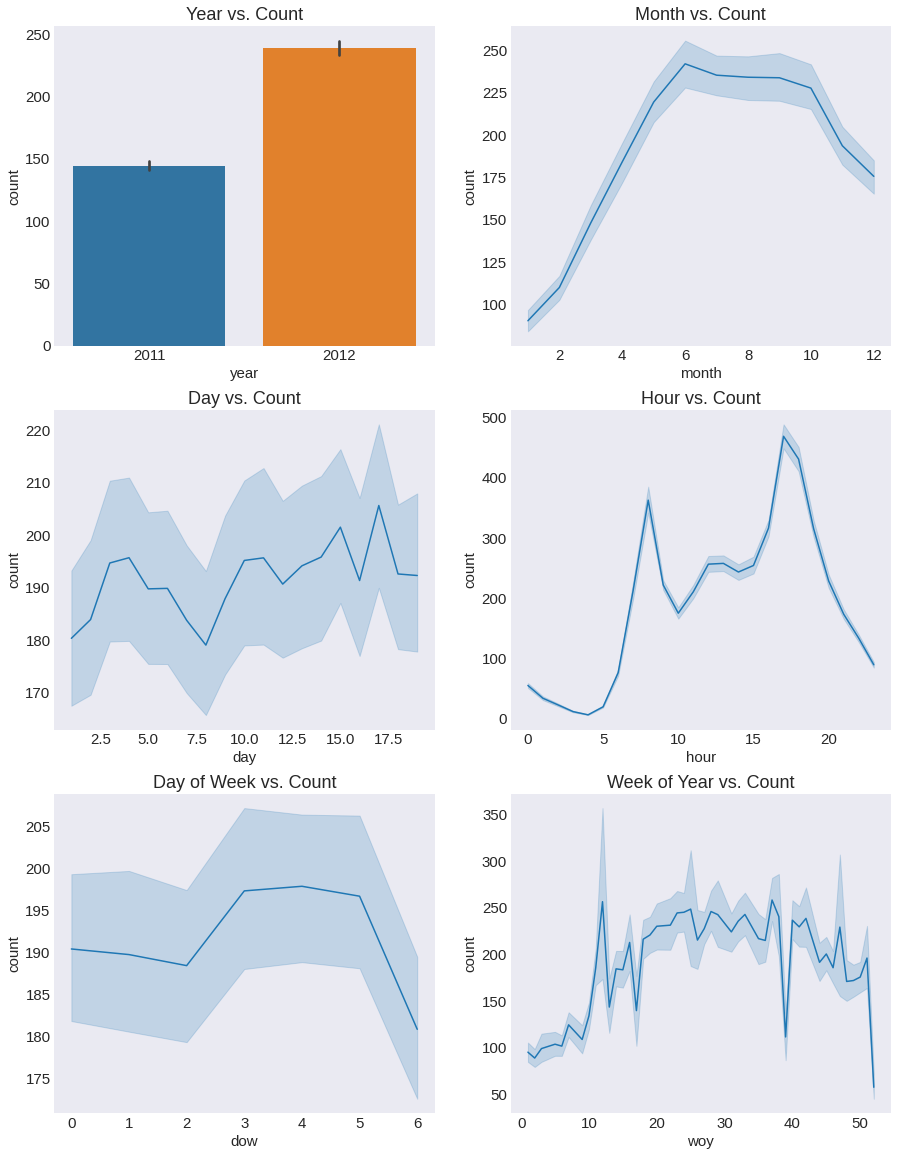

In [302]:
# showing bike rentals per time

fig, ax = plt.subplots(3, 2, figsize=[15,20])

sns.barplot(data=df, x="year", y="count", ax=ax[0,0])

sns.lineplot(data=df, x="month", y="count", ax=ax[0,1])

sns.lineplot(data=df, x="day", y="count", ax=ax[1,0])

sns.lineplot(data=df, x="hour", y="count", ax=ax[1,1])

sns.lineplot(data=df, x="dow", y="count", ax=ax[2,0])

sns.lineplot(data=df, x="woy", y="count", ax=ax[2,1])

ax[0,0].title.set_text('Year vs. Count')

ax[0,1].title.set_text('Month vs. Count')

ax[1,0].title.set_text('Day vs. Count')

ax[1,1].title.set_text('Hour vs. Count')

ax[2,0].title.set_text('Day of Week vs. Count')

ax[2,1].title.set_text('Week of Year vs. Count');


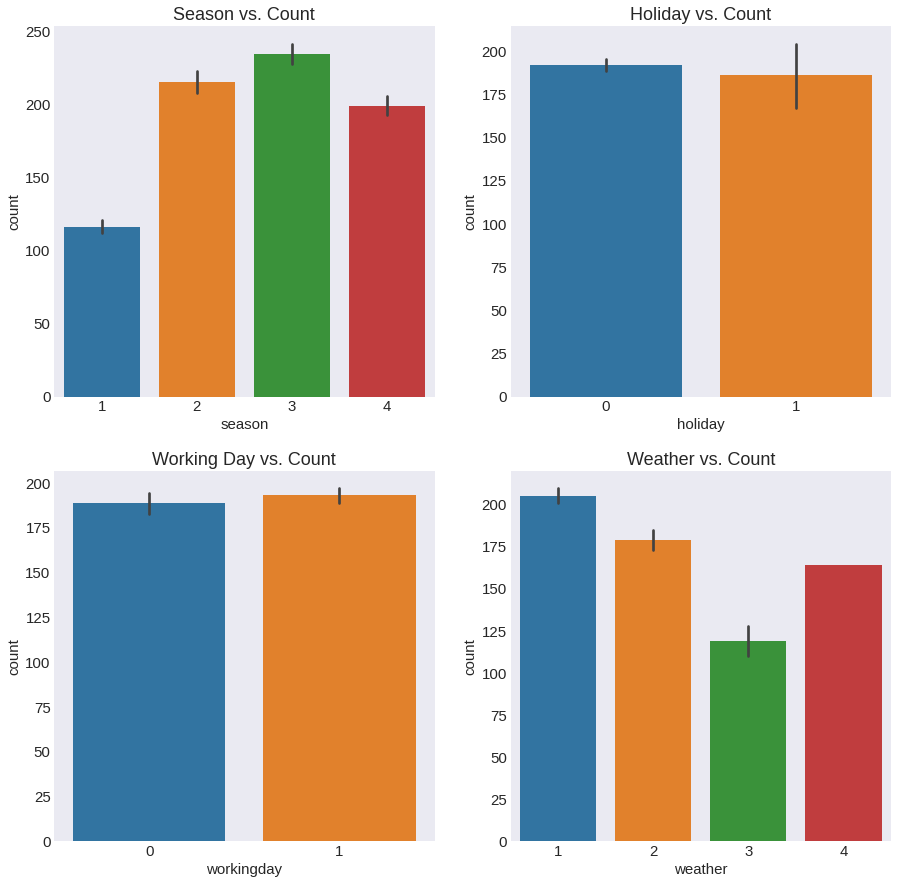

In [303]:
# showing bike rentals per feature

fig, ax = plt.subplots(2, 2, figsize=[15,15])

sns.barplot(data=df, x="season", y="count", ax=ax[0,0])

sns.barplot(data=df, x="holiday", y="count", ax=ax[0,1])

sns.barplot(data=df, x="workingday", y="count", ax=ax[1,0])

sns.barplot(data=df, x="weather", y="count", ax=ax[1,1])

ax[0,0].title.set_text('Season vs. Count')

ax[0,1].title.set_text('Holiday vs. Count')

ax[1,0].title.set_text('Working Day vs. Count')

ax[1,1].title.set_text('Weather vs. Count');

In [304]:
# checking correlations

correlations = df.corr()

correlations

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,day,dow,woy
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,-0.004797,0.971524,0.001729,-0.010553,0.939284
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,0.012021,0.001731,-0.015877,-0.191832,0.000976
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,-0.002482,-0.003394,0.009829,-0.704267,-0.022593
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,-0.012548,0.012144,-0.007890,-0.047692,0.019762
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.061226,0.257589,0.015551,-0.038466,0.240794
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.058540,0.264173,0.011866,-0.040235,0.248653
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,-0.078606,0.204537,-0.011335,-0.026507,0.216435
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,-0.015221,-0.150192,0.036157,-0.024804,-0.145962
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.145241,0.092722,0.014109,0.246959,0.079906
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.264265,0.169451,0.019111,-0.084427,0.156480


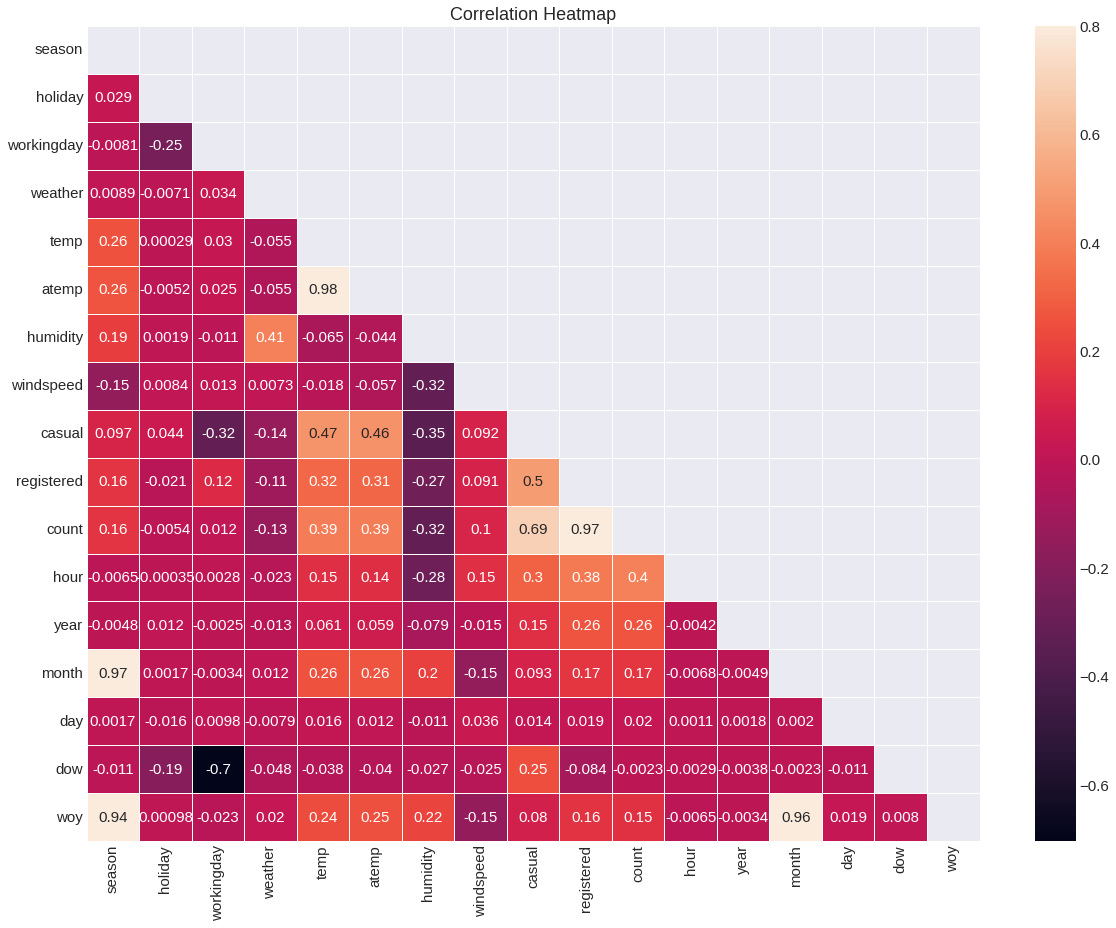

In [305]:
# checking correlations in heatmap

mask = np.zeros_like(correlations)

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1,1, figsize=[20,15])

sns.heatmap(correlations, mask=mask, vmax=.8, square=False, annot=True, ax=ax, linewidths=1)

ax.set_title('Correlation Heatmap');

,Pair,Correlation
0,temp & atemp,0.98
1,season & month,0.97
2,registered & count,0.97
3,month & woy,0.96
4,season & woy,0.94
5,casual & count,0.69
6,casual & registered,0.50
7,temp & casual,0.47
8,atemp & casual,0.46
9,weather & humidity,0.41


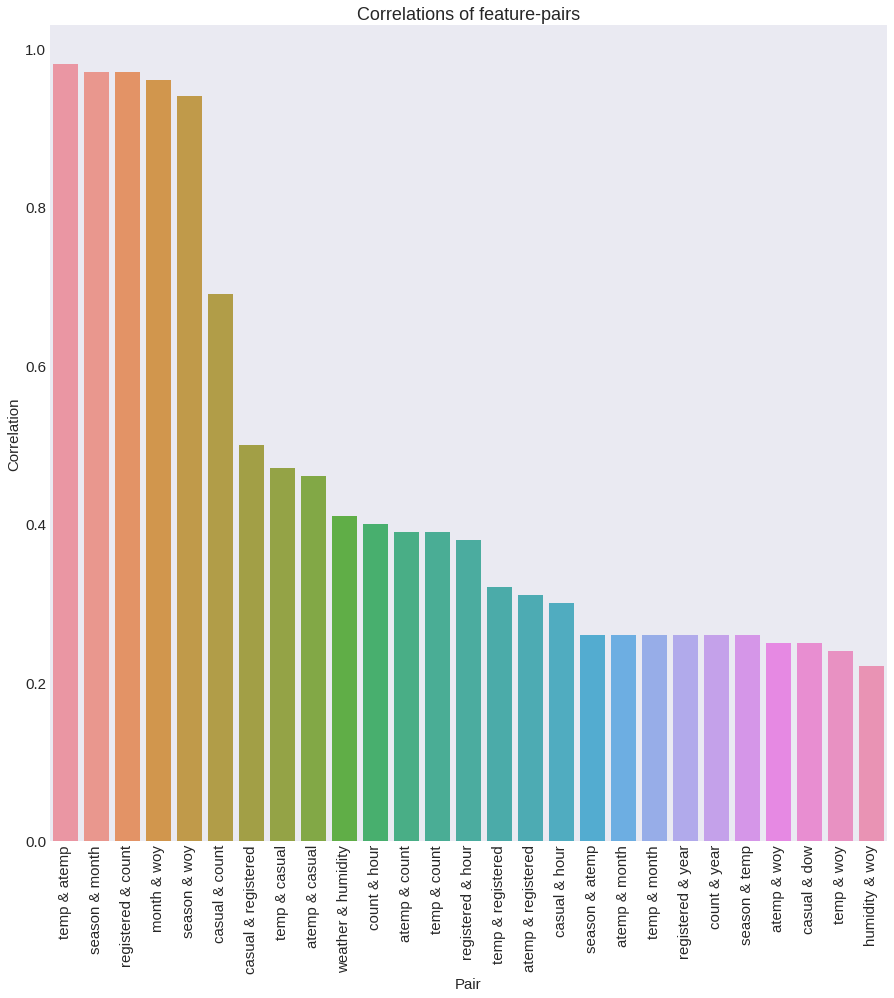

In [306]:
# function for showing correlation between features

def give_corr_pairs(df, lowest_value, plot=False):
  high_corrs_list = []
  df = df.corr()
  for column in df:
    for index, row in df.iterrows():
      value = round((row[column]), ndigits=2)
      if column == index:
        pass
      elif [str(index + " & " + column), value] in high_corrs_list:
        pass
      elif value > lowest_value:
        pair = str(column + " & " + index)
        high_corrs_list.append ([pair, value])

  high_corrs = pd.DataFrame(high_corrs_list, columns=["Pair", "Correlation"])
  high_corrs = high_corrs.sort_values(by=["Correlation"], ascending=False)
  high_corrs.reset_index(drop=True, inplace=True)

  fig, ax = plt.subplots(1, 1, figsize=[15,15])
  sns.barplot(data=high_corrs, x="Pair", y="Correlation")
  ax.set_title("Correlations of feature-pairs")
  plt.xticks(rotation=90)
  
  return high_corrs

give_corr_pairs(df, 0.2, plot=True)


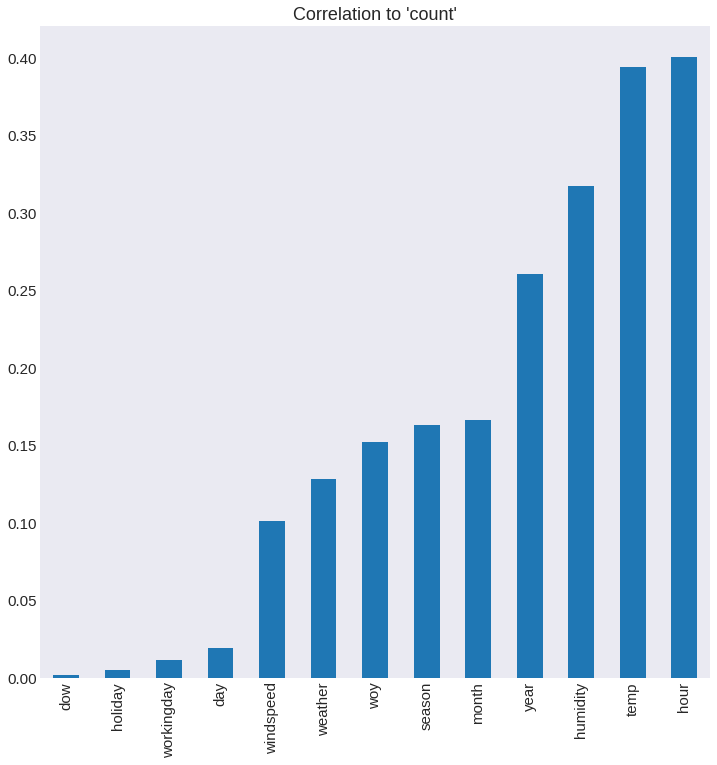

In [307]:
# checking correlations to 'count'

correlations_to_count = correlations.drop(["count", "registered", "casual", "atemp"])

correlations_to_count["count"].abs().sort_values().plot(kind="bar", figsize=[12,12], title="Correlation to 'count'");

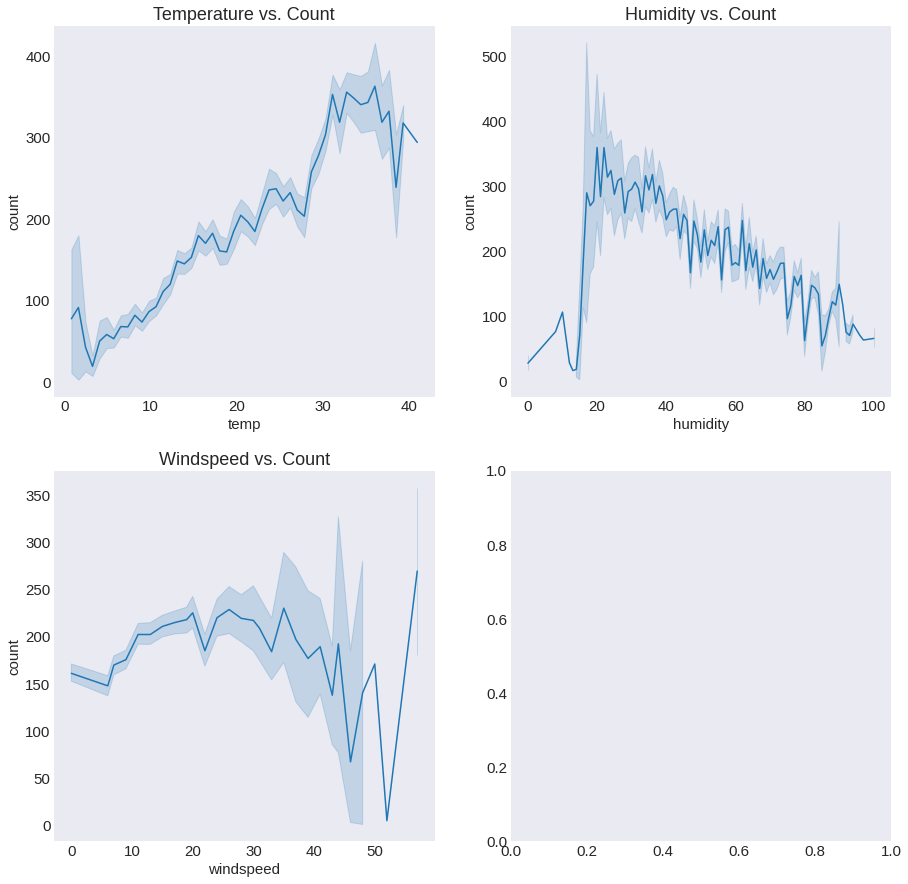

In [308]:
# showing bike rentals compared to numerical features

fig, ax = plt.subplots(2, 2, figsize=[15,15])

sns.lineplot(data=df, x="temp", y="count", ax=ax[0,0])

sns.lineplot(data=df, x="humidity", y="count", ax=ax[0,1])

sns.lineplot(data=df, x="windspeed", y="count", ax=ax[1,0])


ax[0,0].title.set_text('Temperature vs. Count')

ax[0,1].title.set_text('Humidity vs. Count')

ax[1,0].title.set_text('Windspeed vs. Count')



In [309]:
# checking weather feature distribution

df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

### Split data

In [310]:
# define X and y

X = df[["hour", "temp", "humidity", "year", "month", "season", "weather", "windspeed", "workingday", "dow", "woy", "holiday"]]

y = df['count']

In [311]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Feature Engineering

In [312]:
# creating "hour"-pipeline

hour_pipe = Pipeline(steps=[("polytransform", PolynomialFeatures(degree=8, include_bias=False))])

In [313]:
X_train

,hour,temp,humidity,year,month,season,weather,windspeed,workingday,dow,woy,holiday
datetime,,,,,,,,,,,,
2011-07-11 00:00:00,0,28.70,65,2011,7,3,1,12.9980,1,0,28,0
2012-05-18 22:00:00,22,22.96,52,2012,5,2,1,22.0028,1,4,20,0
2011-04-01 23:00:00,23,12.30,61,2011,4,2,1,6.0032,1,4,13,0
2012-09-16 09:00:00,9,23.78,60,2012,9,3,1,8.9981,0,6,37,0
2011-02-01 23:00:00,23,8.20,93,2011,2,1,3,12.9980,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-14 02:00:00,2,6.56,47,2012,1,1,1,11.0014,0,5,2,0
2011-12-10 09:00:00,9,11.48,61,2011,12,4,1,19.0012,0,5,49,0
2011-12-18 16:00:00,16,11.48,48,2011,12,4,1,16.9979,0,6,50,0


In [314]:
# setting up the Column Transformer

initial_transformation = ColumnTransformer( 
    [
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False, drop="if_binary"), ["weather", "season", "year" ,"month", "workingday", "holiday", "dow", "woy"]),
        ("std_scaler", MinMaxScaler(), ["temp", "humidity", "windspeed"]),
        ("hour_pipe", hour_pipe, ["hour"])
    ],
)

In [315]:
# applying fit and transformation

X_train_FE = pd.DataFrame(initial_transformation.fit_transform(X_train), columns = initial_transformation.get_feature_names_out())

X_test_FE = pd.DataFrame(initial_transformation.transform(X_test), columns = initial_transformation.get_feature_names_out())

In [316]:
# checking feature-engineered data-frame

X_train_FE

,encoder__weather_1,encoder__weather_2,encoder__weather_3,encoder__weather_4,encoder__season_1,encoder__season_2,encoder__season_3,encoder__season_4,encoder__year_2012,encoder__month_1,...,hour_pipe__hour^7,hour_pipe__temp^8,hour_pipe__temp^7 hour,hour_pipe__temp^6 hour^2,hour_pipe__temp^5 hour^3,hour_pipe__temp^4 hour^4,hour_pipe__temp^3 hour^5,hour_pipe__temp^2 hour^6,hour_pipe__temp hour^7,hour_pipe__hour^8
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000e+00,4.603150e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.494358e+09,7.722805e+10,7.399900e+10,7.090497e+10,6.794030e+10,6.509959e+10,6.237766e+10,5.976953e+10,5.727046e+10,5.487587e+10
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.404825e+09,5.238909e+08,9.796335e+08,1.831835e+09,3.425382e+09,6.405187e+09,1.197718e+10,2.239635e+10,4.187935e+10,7.831099e+10
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,4.782969e+06,1.022574e+11,3.870129e+10,1.464725e+10,5.543535e+09,2.098058e+09,7.940505e+08,3.005237e+08,1.137390e+08,4.304672e+07
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.404825e+09,2.044141e+07,5.733566e+07,1.608195e+08,4.510792e+08,1.265222e+09,3.548794e+09,9.953933e+09,2.791957e+10,7.831099e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.280000e+02,3.429499e+06,1.045579e+06,3.187741e+05,9.718723e+04,2.963025e+04,9.033613e+03,2.754150e+03,8.396800e+02,2.560000e+02
8160,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.782969e+06,3.016721e+08,2.365025e+08,1.854114e+08,1.453573e+08,1.139561e+08,8.933841e+07,7.003882e+07,5.490848e+07,4.304672e+07
8161,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.684355e+08,3.016721e+08,4.204489e+08,5.859915e+08,8.167128e+08,1.138276e+09,1.586447e+09,2.211076e+09,3.081639e+09,4.294967e+09
8162,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8.235430e+05,3.471680e+09,1.559805e+09,7.008108e+08,3.148701e+08,1.414692e+08,6.356127e+07,2.855769e+07,1.283080e+07,5.764801e+06


### Create and apply model

In [317]:
# create model

#pr = PoissonRegressor(alpha=1)
#pr = LinearRegression()

pr = RandomForestRegressor(n_estimators= 1000, max_depth= 15, min_samples_split = 5, n_jobs= -1)

pr.fit(X_train_FE, y_train)

y_pred_pr = pr.predict(X_train_FE)

y_test_pr = pr.predict(X_test_FE)

In [318]:
# calculate R2 score for train-data

print("R2 score for train-data: ", pr.score(X_train_FE, y_train))

R2 score for train-data:  0.9833581792256582


In [319]:
# calculate R2 score for test-data

print("R2 score for test-data: ", pr.score(X_test_FE, y_test))

R2 score for test-data:  0.9450874996975466


In [320]:
# cross-validation

cv = KFold(n_splits=5, shuffle=True, random_state=1)

scores = cross_val_score(pr, X_train_FE, y_train, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1)

scores = abs(scores)
scores = scores**0.5

print(f'Validation accuracy RMSLE scores: {np.round(scores,2)}')
print(f'\nmean: {scores.mean():.2}')
print(f'\nstd: {scores.std():.2}')

Validation accuracy RMSLE scores: [0.36 0.36 0.35 0.36 0.38]

mean: 0.36

std: 0.0094


In [321]:
# calculating MSE, RMSLE & MSLE

print ("Loss functions for train-dataset:\n\n")

mse = mean_squared_error(y_train, y_pred_pr, squared=False)

print ("MSE is: ", mse)

def calc_rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

rmsle = calc_rmsle(y_train, y_pred_pr)

print ("RMSLE is: ", rmsle)

msle = mean_squared_log_error(y_train, y_pred_pr)

print ("MSLE is: ", msle)

Loss functions for train-dataset:


MSE is:  23.366615071522684
RMSLE is:  0.21142100168677397
MSLE is:  0.04469883995423888


In [322]:
# calculating MSE, RMSLE & MSLE
print ("Loss functions for test-dataset:\n\n")

mse = mean_squared_error(y_test, y_test_pr, squared=False)

print ("MSE is: ", mse)

rmsle = calc_rmsle(y_test, y_test_pr)

print ("RMSLE is: ", rmsle)


msle = mean_squared_log_error(y_test, y_test_pr)

print ("MSLE is: ", msle)

Loss functions for test-dataset:


MSE is:  42.44880430208451
RMSLE is:  0.33480972192383573
MSLE is:  0.11209754989471622


### Submit to Keggle

In [323]:
# import Keggle test data

df_keggle = pd.read_csv("data/test.csv", index_col=0, parse_dates=True)

In [324]:
# extracting hours, year, month and day from datetime

df_keggle['hour'] = df_keggle.index.hour

df_keggle['year'] = df_keggle.index.year

df_keggle["month"] = df_keggle.index.month

df_keggle["day"] = df_keggle.index.day

df_keggle["dow"] = df_keggle.index.dayofweek

df_keggle["woy"] = df_keggle.index.weekofyear

/tmp/ipykernel_7532/2793567698.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_keggle["woy"] = df_keggle.index.weekofyear


In [325]:
# getting features from Keggle data

X_keggle = df_keggle[["hour", "temp", "humidity", "year", "month", "season", "weather", "windspeed", "workingday", "dow", "woy", "holiday"]]

In [326]:
X_keggle

,hour,temp,humidity,year,month,season,weather,windspeed,workingday,dow,woy,holiday
datetime,,,,,,,,,,,,
2011-01-20 00:00:00,0,10.66,56,2011,1,1,1,26.0027,1,3,3,0
2011-01-20 01:00:00,1,10.66,56,2011,1,1,1,0.0000,1,3,3,0
2011-01-20 02:00:00,2,10.66,56,2011,1,1,1,0.0000,1,3,3,0
2011-01-20 03:00:00,3,10.66,56,2011,1,1,1,11.0014,1,3,3,0
2011-01-20 04:00:00,4,10.66,56,2011,1,1,1,11.0014,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,19,10.66,60,2012,12,1,2,11.0014,1,0,1,0
2012-12-31 20:00:00,20,10.66,60,2012,12,1,2,11.0014,1,0,1,0
2012-12-31 21:00:00,21,10.66,60,2012,12,1,1,11.0014,1,0,1,0


In [327]:
# applying feature engineering

X_keggle_FE = pd.DataFrame(initial_transformation.transform(X_keggle), columns=initial_transformation.get_feature_names_out())

/home/valentin/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [328]:
# predicting values for Keggle test data

keggle_pred = pr.predict(X_keggle_FE)

In [329]:
# creating output file

output = pd.DataFrame({'datetime': df_keggle.index, 'count': keggle_pred})

output.to_csv('keggle_submission_05.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
